In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_sales



In [197]:

# 1. Data Generation

dates = pd.date_range(start = '2025-01-01', end = '2025-12-01', freq='MS')

sales_A=generate_sales(50, 100)
sales_B=generate_sales(30, 80)
sales_C=generate_sales(20, 60)
sales_D=generate_sales(10, 50)

df_initial = pd.DataFrame({
    'Date': dates,
    'Product_A': sales_A,
    'Product_B': sales_B,
    'Product_C': sales_C,
    'Product_D': sales_D
})

df_initial.to_csv('data/initial.csv', index=False)
print(df_initial)



         Date  Product_A  Product_B  Product_C  Product_D
0  2025-01-01         84         31         25         26
1  2025-02-01         62         67         23         26
2  2025-03-01         76         64         48         50
3  2025-04-01         68         45         34         31
4  2025-05-01         83         46         29         38
5  2025-06-01         78         49         32         43
6  2025-07-01         73         60         24         39
7  2025-08-01         99         51         60         42
8  2025-09-01         59         77         38         16
9  2025-10-01         51         54         26         24
10 2025-11-01         82         42         54         31
11 2025-12-01         74         43         51         12


In [198]:
# 2. Build DataFrame

df_final=df_initial.copy()
df_final=df_final.rename(columns={
    'Date':'Month'})

df_final['Month'] = df_final['Month'].dt.strftime('%B %Y')
df_final['Total_Sales'] = df_final[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)
df_final['Average_Sales'] = df_final[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1).round(2)
df_final['Month_Over_Month_Growth']=df_final['Total_Sales'].pct_change()

def assign_quarter(month_str):
    month = int(month_str.split('-')[1])
    if month <= 3:
        return 'Q1'
    elif month <= 6:
        return 'Q2'
    elif month <= 9:
        return 'Q3'
    else:
        return 'Q4'
    
df_final['Quarter'] = df_final['Month'].apply(lambda x: assign_quarter(pd.to_datetime(x).strftime('%Y-%m')))


df_final['Max_Sales_Product']=df_final[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmax(axis=1)
df_final['Min_Sales_Product']=df_final[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmin(axis=1) 

df_final.to_csv('data/final.csv', index=False)
print(df_final)


             Month  Product_A  Product_B  Product_C  Product_D  Total_Sales  \
0     January 2025         84         31         25         26          166   
1    February 2025         62         67         23         26          178   
2       March 2025         76         64         48         50          238   
3       April 2025         68         45         34         31          178   
4         May 2025         83         46         29         38          196   
5        June 2025         78         49         32         43          202   
6        July 2025         73         60         24         39          196   
7      August 2025         99         51         60         42          252   
8   September 2025         59         77         38         16          190   
9     October 2025         51         54         26         24          155   
10   November 2025         82         42         54         31          209   
11   December 2025         74         43         51 

In [199]:
# 3. Pivot Tables & Summaries

pivot_average = pd.pivot_table(
    df_final,
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Total_Sales'],
    index='Quarter',
    aggfunc='mean'
    ).round(3)

print(pivot_average)


pivot_total = pd.pivot_table(
    df_final,
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Total_Sales'],
    index='Quarter',
    aggfunc='sum'      
    )

print(pivot_total)

with open('data/output.csv', 'w', encoding='utf-8') as f:
    f.write("   Average Sales per Quarter \n")
    pivot_average.to_csv(f)
    
    f.write("\n\n  Total Sales per Quarter \n")
    pivot_total.to_csv(f)

         Product_A  Product_B  Product_C  Product_D  Total_Sales
Quarter                                                         
Q1          74.000     54.000     32.000     34.000      194.000
Q2          76.333     46.667     31.667     37.333      192.000
Q3          77.000     62.667     40.667     32.333      212.667
Q4          69.000     46.333     43.667     22.333      181.333
         Product_A  Product_B  Product_C  Product_D  Total_Sales
Quarter                                                         
Q1             222        162         96        102          582
Q2             229        140         95        112          576
Q3             231        188        122         97          638
Q4             207        139        131         67          544


In [200]:
# 4 Key Insights - finding the best things


#  Best month (highest Total_Sales)
highest_sales = df_final['Total_Sales'].max()                   
row_number = df_final['Total_Sales'].idxmax()                   
best_month = df_final.loc[row_number, 'Month']                   

print(f"1. The best month is: {best_month} with {highest_sales} units")


#  Best product (most sales in the whole year)
total_A = df_final['Product_A'].sum()
total_B = df_final['Product_B'].sum()
total_C = df_final['Product_C'].sum()
total_D = df_final['Product_D'].sum()

#  list to compare
products_totals = [total_A, total_B, total_C, total_D]
product_names = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

best_position = products_totals.index(max(products_totals))
best_product = product_names[best_position]
best_product_sales = max(products_totals)

print(f"2. The best product is: {best_product} with {best_product_sales} units in the year")



#  Best quarter (from the pivot table we made before)
best_quarter = pivot_total['Total_Sales'].idxmax()         
best_quarter_sales = pivot_total['Total_Sales'].max()

print(f"3. The best quarter is: {best_quarter} with {best_quarter_sales} units")




1. The best month is: August 2025 with 252 units
2. The best product is: Product_A with 889 units in the year
3. The best quarter is: Q3 with 638 units


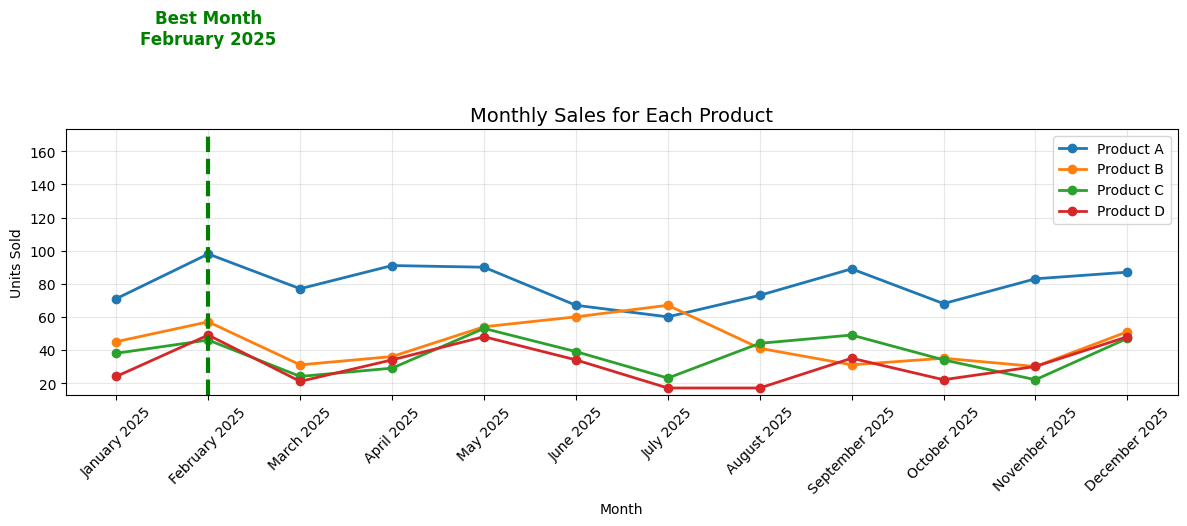

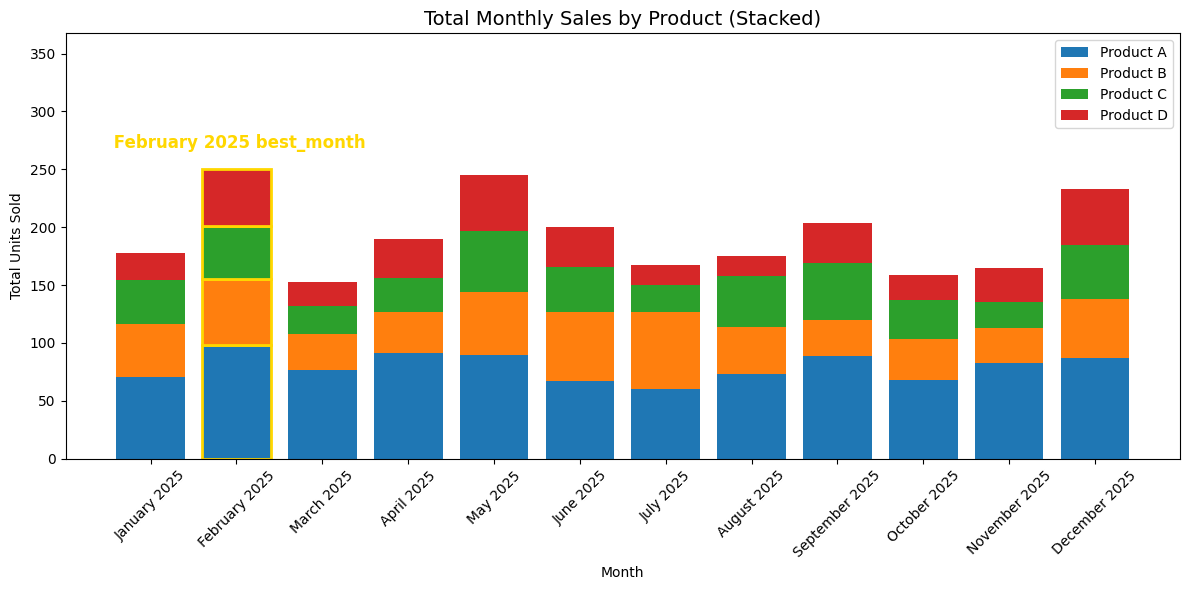

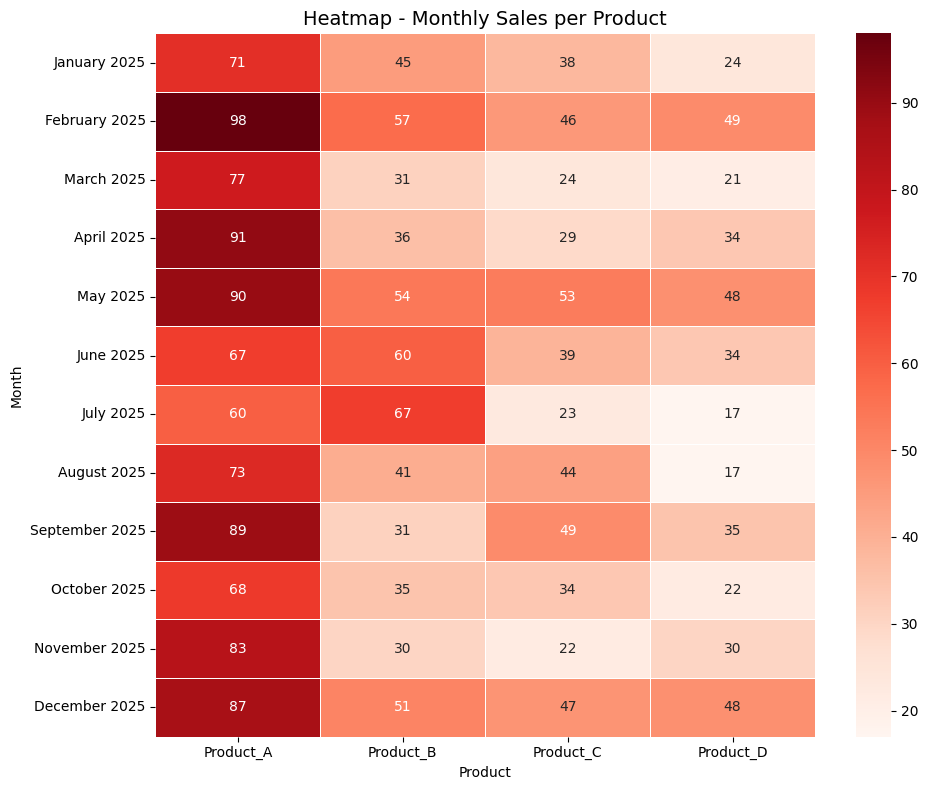

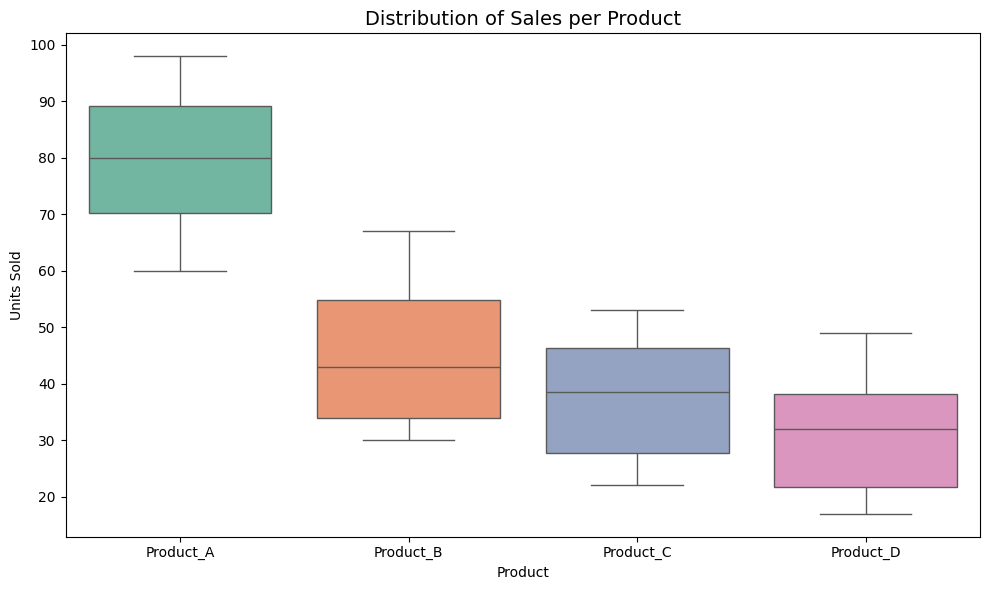

In [ ]:

# 5. Visualizations - 4 charts

import matplotlib.pyplot as plt
import seaborn as sns

# Find best month index (for highlighting)
best_idx = df_final['Total_Sales'].idxmax()
best_month = df_final.loc[best_idx, 'Month']

# Chart 1: Line chart for each product
plt.figure(figsize=(12, 6))
plt.plot(df_final['Month'], df_final['Product_A'], marker='o', label='Product A', linewidth=2)
plt.plot(df_final['Month'], df_final['Product_B'], marker='o', label='Product B', linewidth=2)
plt.plot(df_final['Month'], df_final['Product_C'], marker='o', label='Product C', linewidth=2)
plt.plot(df_final['Month'], df_final['Product_D'], marker='o', label='Product D', linewidth=2)

plt.title('Monthly Sales for Each Product', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Highlight best month
plt.axvline(x=best_idx, color='green', linestyle='--', linewidth=3)
plt.text(best_idx, df_final['Total_Sales'].max() * 0.9,
         f'Best Month\n{best_month}', color='green', fontsize=12, fontweight='bold', ha='center')
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax * 1.7)


plt.tight_layout()
plt.show()

# Chart 2: Stacked bar chart + highlight best month
plt.figure(figsize=(12, 6))

plt.bar(df_final['Month'], df_final['Product_A'], label='Product A')
plt.bar(df_final['Month'], df_final['Product_B'], bottom=df_final['Product_A'], label='Product B')
plt.bar(df_final['Month'], df_final['Product_C'],
        bottom=df_final['Product_A'] + df_final['Product_B'], label='Product C')
plt.bar(df_final['Month'], df_final['Product_D'],
        bottom=df_final['Product_A'] + df_final['Product_B'] + df_final['Product_C'], label='Product D')

plt.title('Total Monthly Sales by Product (Stacked)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.legend()
plt.xticks(rotation=45)

# # Color the best month in gold
bars = plt.gca().patches
for bar in bars[best_idx::12]:    # كل 12 عمود = المنتج الواحد في كل الشهور
    bar.set_edgecolor('gold')
    bar.set_linewidth(2)



plt.text(best_idx, 
         df_final['Total_Sales'].max() + 15,
         f' {best_month} best_month',
         ha='center', va='bottom',
         fontsize=12, fontweight='bold', color='gold')
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax * 1.4)


plt.tight_layout()
plt.show()

# Chart 3: Seaborn heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df_final.set_index('Month')[['Product_A', 'Product_B', 'Product_C', 'Product_D']]

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds', linewidths=0.5, linecolor='white')
plt.title('Heatmap - Monthly Sales per Product', fontsize=14)
plt.ylabel('Month')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

# Chart 4: Seaborn boxplot
plt.figure(figsize=(10, 6))
melted = df_final.melt(value_vars=['Product_A', 'Product_B', 'Product_C', 'Product_D'],
                       var_name='Product', value_name='Sales')

# sns.boxplot(x='Product', y='Sales', data=melted, palette='Set2')
sns.boxplot(x='Product', y='Sales', data=melted, hue='Product', palette='Set2', legend=False)
plt.title('Distribution of Sales per Product', fontsize=14)
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


In [202]:

#  Conclusion Questions - simple answers


print("Conclusion - Answers to the three questions")


# Question 1
total_a = df_final['Product_A'].sum()
total_b = df_final['Product_B'].sum()
total_c = df_final['Product_C'].sum()
total_d = df_final['Product_D'].sum()

best_product_name = 'Product A'
if total_b > total_a:
    best_product_name = 'Product B'
elif total_c > total_a and total_c > total_b:
    best_product_name = 'Product C'
elif total_d > total_a and total_d > total_b and total_d > total_c:
    best_product_name = 'Product D'

print("1. Which product contributes the most?")
print(f"   The best product is {best_product_name}")
print(f"   It sold {int(max(total_a,total_b,total_c,total_d))} units in the whole year")
print()

# Question 2
best_quarter = pivot_total['Total_Sales'].idxmax()
best_quarter_sales = int(pivot_total['Total_Sales'].max())

print("2. Which quarter performs best and why?")
print(f"   The best quarter is {best_quarter} with {best_quarter_sales} units sold")
if best_quarter == 'Q4':
    print("   Probably because of Christmas and New Year shopping")
elif best_quarter == 'Q2':
    print("   Maybe summer promotions or holidays helped")
else:
    print("   Could be strong marketing or seasonal demand")
print()

# Question 3
print("3. How to improve sales in 2026?")
print("   Some ideas from the data:")
print(f"    Focus more on {best_product_name} (it's the strongest)")
print(f"    Prepare extra stock and ads for {best_quarter}")
print(f"    Run big campaigns every year in {best_month} (our best month)")
print("    Give discounts on weak products in slow months")
print("    Watch MoM_Growth to predict and plan early")





Conclusion - Answers to the three questions
1. Which product contributes the most?
   The best product is Product A
   It sold 889 units in the whole year

2. Which quarter performs best and why?
   The best quarter is Q3 with 638 units sold
   Could be strong marketing or seasonal demand

3. How to improve sales in 2026?
   Some ideas from the data:
    Focus more on Product A (it's the strongest)
    Prepare extra stock and ads for Q3
    Run big campaigns every year in August 2025 (our best month)
    Give discounts on weak products in slow months
    Watch MoM_Growth to predict and plan early
